/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


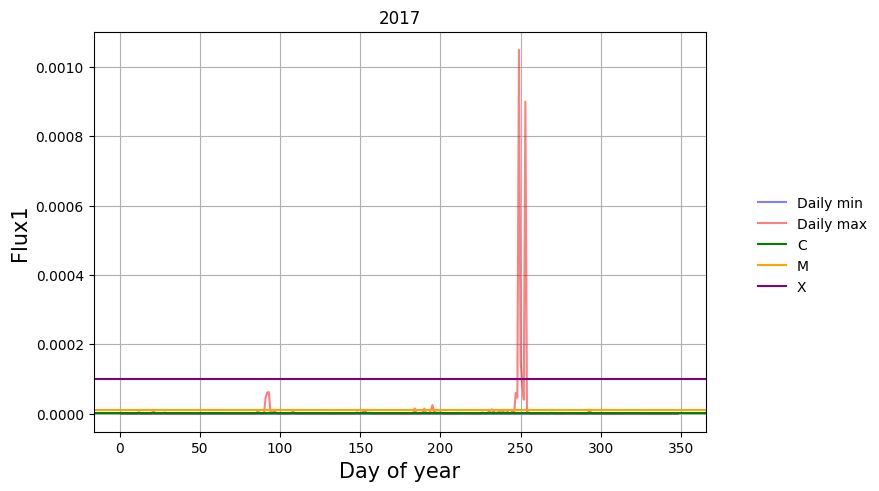

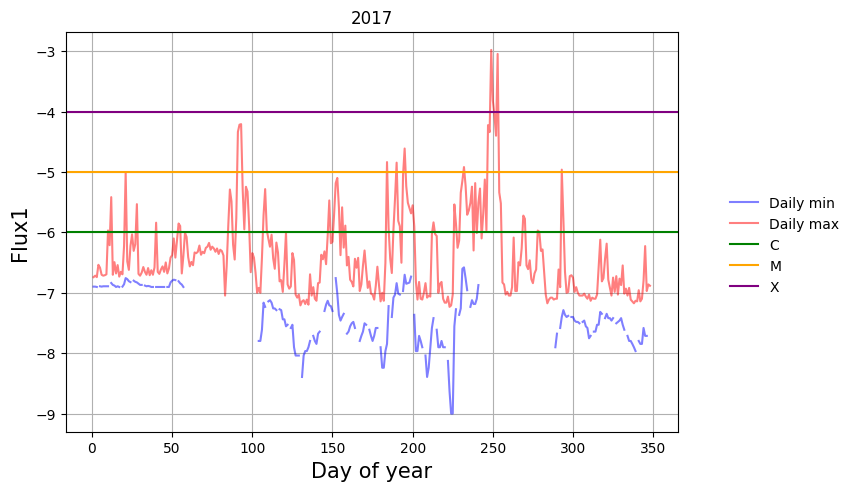

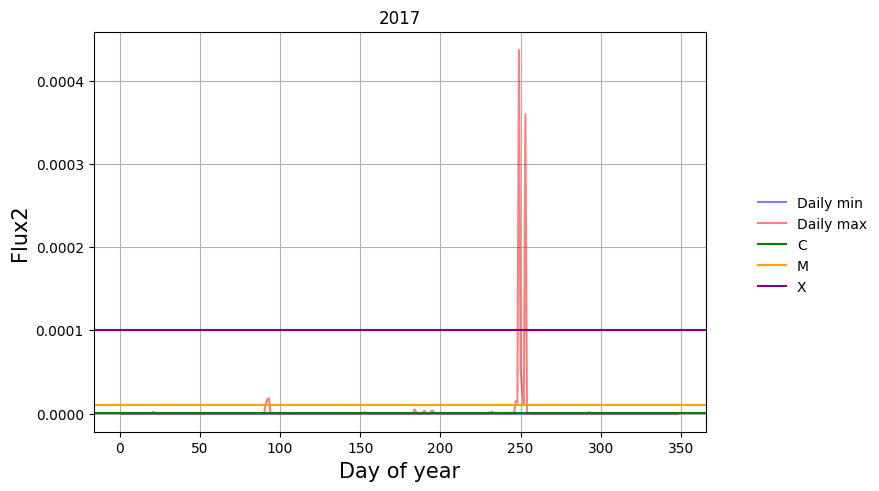

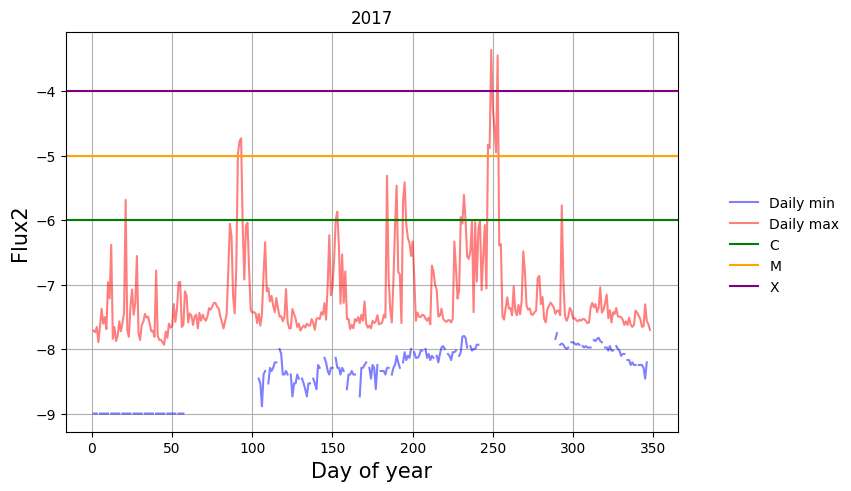

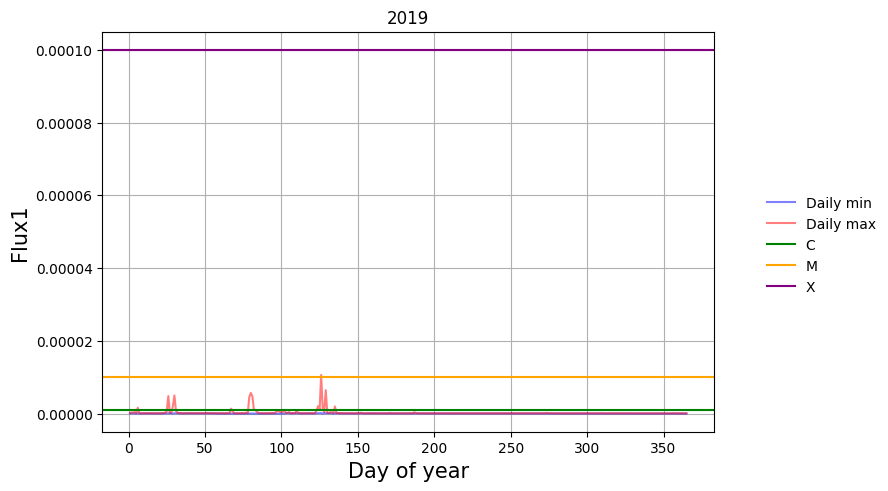

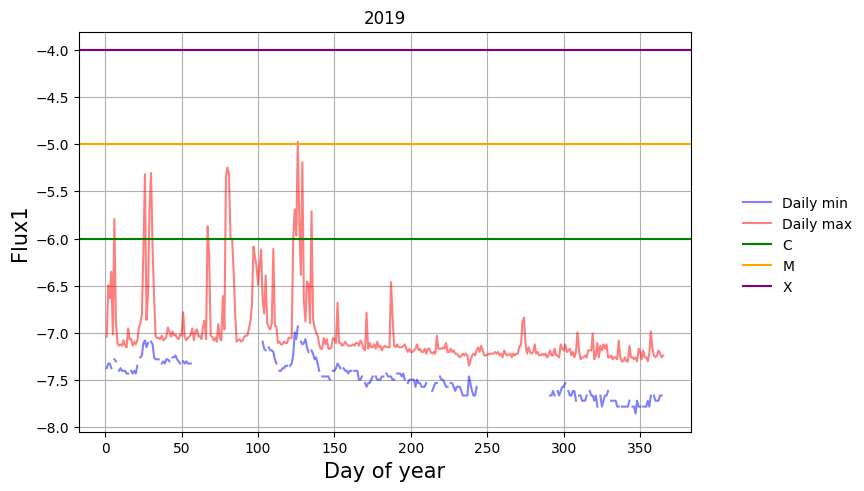

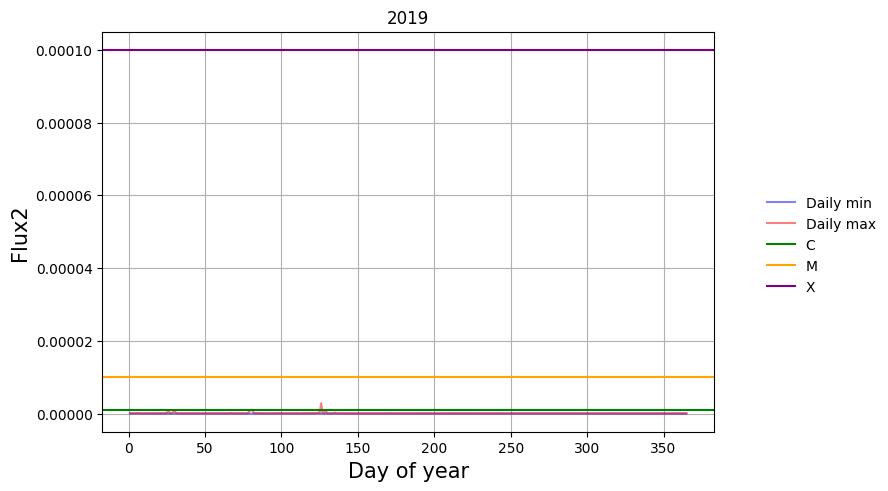

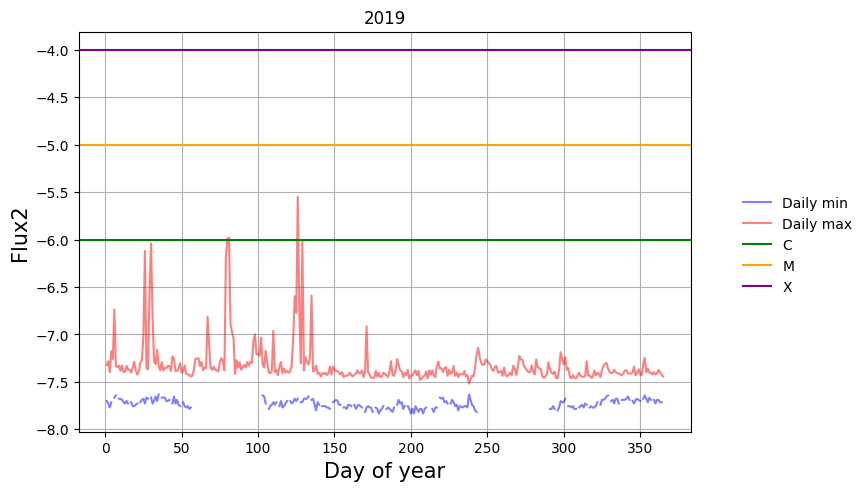

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from read import get_goes

# Generate summary time series plots showing the daily minimum and
# daily maximum flux for each instrument (flux-1 and flux-2) in
# each year.  Mark the thresholds for C, M, and X flares with
# horizontal lines.

years = [2017, 2019]

pdf = PdfPages("tsplot_py.pdf")

for year in years:

    df = get_goes(year)
    df["Time"] = pd.to_datetime(df[["Year", "Month", "Day"]])
    df["DayofYear"] = [x.dayofyear for x in df.Time]

    for vn in ["Flux1", "Flux2"]:
        for dolog in [False, True]:

            if dolog:
                df["Flux"] = np.log10(df[vn])
            else:
                df["Flux"] = df[vn]
            dx = df.groupby("DayofYear").agg({"Flux": [np.min, np.max]})

            plt.figure(figsize=(9, 5))
            plt.clf()
            plt.axes([0.13, 0.12, 0.68, 0.8])
            plt.grid(True)
            plt.plot(dx.index, dx[("Flux", "amin")], "-", color="blue", label="Daily min", alpha=0.5)
            plt.plot(dx.index, dx[("Flux", "amax")], "-", color="red", label="Daily max", alpha=0.5)
            if dolog:
                plt.axhline(-6, label="C", color="green")
                plt.axhline(-5, label="M", color="orange")
                plt.axhline(-4, label="X", color="purple")
            else:
                plt.axhline(10**-6, label="C", color="green")
                plt.axhline(10**-5, label="M", color="orange")
                plt.axhline(10**-4, label="X", color="purple")
            ha, lb = plt.gca().get_legend_handles_labels()
            leg = plt.figlegend(ha, lb, loc="center right")
            leg.draw_frame(False)
            plt.xlabel("Day of year", size=15)
            plt.ylabel(vn, size=15)
            plt.title(year)
            pdf.savefig()

pdf.close()